In [1]:
%run _2_RETURNS_updt_.py

GETTING READY DATA FOR RETURNS :::


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


DONE

  Period  TotalHoldingValue     TotalDiv AnalysisEndDate
0     0m      115097.798150  5473.737731      2024-04-07
1     3m      106288.308112  4921.437271      2024-01-07
2     6m      103778.781404  4100.536824      2023-10-07
3    12m      105675.749505  2212.981803      2023-04-07


 DF_RETURNS :: 

   Period  TotalHoldingValue     TotalDiv AnalysisEndDate     cash
0     0m      115097.798150  5473.737731      2024-04-07   583.60
1     3m      106288.308112  4921.437271      2024-01-07  2968.23
2     6m      103778.781404  4100.536824      2023-10-07  1852.20
3    12m      105675.749505  2212.981803      2023-04-07  1852.20


# DIV

In [2]:

import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrame

# Using the provided pivot_table method from the user to create the df_pivot DataFrame
df_pivot = df_master.pivot_table(index='Stock', columns='m_period', values='dividend_total', aggfunc='sum').fillna(0)

# Sorting the columns based on the period to ensure correct subtraction
sorted_columns = sorted(df_pivot.columns, key=lambda x: int(x[:-1]))
df_pivot = df_pivot[sorted_columns]

# Calculate the difference in dividends from one period to the next
df_pivot_diff = df_pivot.diff(axis=1).fillna(0)

# Since the first period (0m) has no previous data to subtract from, the difference will be set as the original values
df_pivot_diff[sorted_columns[0]] = df_pivot[sorted_columns[0]]

print(df_pivot)

m_period          0m          3m          6m         12m
Stock                                                   
360.AX      0.000000    0.000000    0.000000    0.000000
ACDC.AX   200.154203  200.154203  200.154203    0.000000
ALD.AX     94.858109   77.345843   77.345843   49.618088
AMC.AX    157.254132  134.279123  110.396250   65.366201
ANN.AX    110.207671  110.207671  110.207671   71.456177
ANZ.AX    263.353755  263.353755  126.295817   60.296067
APA.AX     53.635429   53.635429   36.195688   17.110689
BHP.AX    258.275242  218.847657  218.847657  173.864691
BUGG.AX     0.000000    0.000000    0.000000    0.000000
BXB.AX     58.375750   42.702969   42.702969   27.885437
CBA.AX    136.233163  105.238317  105.238317   70.639418
CHC.AX    115.584667  115.584667   76.078783   37.270377
CLDD.AX   117.739326  117.739326  117.739326  117.739326
COL.AX     91.186546   66.317488   66.317488   45.593273
CSL.AX     47.615674   38.363327   38.363327   28.036871
CSR.AX    149.870381  149.87038

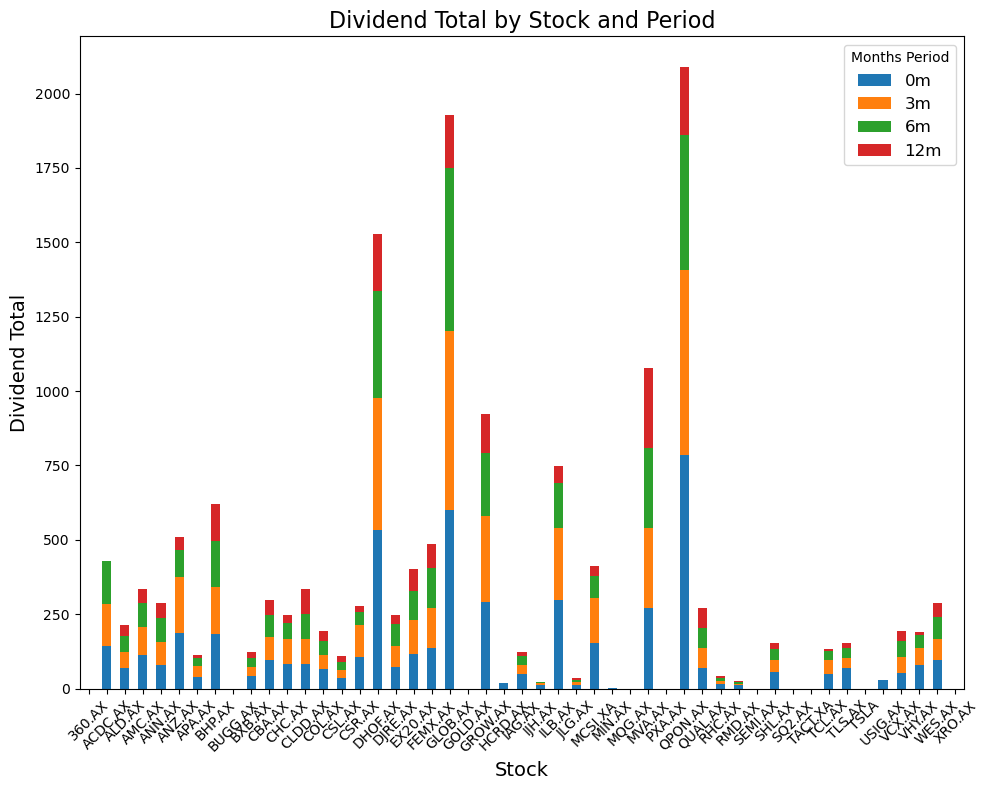

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

colors_list = ['#0a2144', '#3070b6', '#ecc046', '#e9993e', '#86cdf2', '#a8aaa5', 
               '#4eabe9', '#707070', '#5c96c8', '#3372b6', '#306fb5']
 #Pivot the data for stacked bar chart

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
df_pivot.plot(kind='bar', stacked=True, ax=ax)

# Customization for clarity and professionalism
ax.set_title('Dividend Total by Stock and Period', fontsize=16)
ax.set_xlabel('Stock', fontsize=14)
ax.set_ylabel('Dividend Total', fontsize=14)

# Adjusting the legend position so it does not overlap with the chart
ax.legend(title='Months Period', fontsize=12, loc='upper right')

# Set the x-axis labels to rotate for better readability
plt.xticks(rotation=45)

# Apply a tight layout to adjust spacing
plt.tight_layout()



In [11]:
df_pivot.reset_index()

m_period,Stock,0m,3m,6m,12m
0,360.AX,0.000000,0.000000,0.000000,0.000000
1,ACDC.AX,142.880189,142.880189,142.880189,0.000000
2,ALD.AX,67.574634,55.099317,55.099317,35.346732
3,AMC.AX,112.187753,95.796993,78.758549,46.633351
4,ANN.AX,78.622123,78.622123,78.622123,50.976818
5,ANZ.AX,187.755600,187.755600,90.077381,43.004685
6,APA.AX,38.178533,38.178533,25.764654,12.179655
7,BHP.AX,184.208455,156.087702,156.087702,124.004709
8,BUGG.AX,0.000000,0.000000,0.000000,0.000000
9,BXB.AX,41.572214,30.410863,30.410863,19.858577


In [12]:
#df_pivot['']

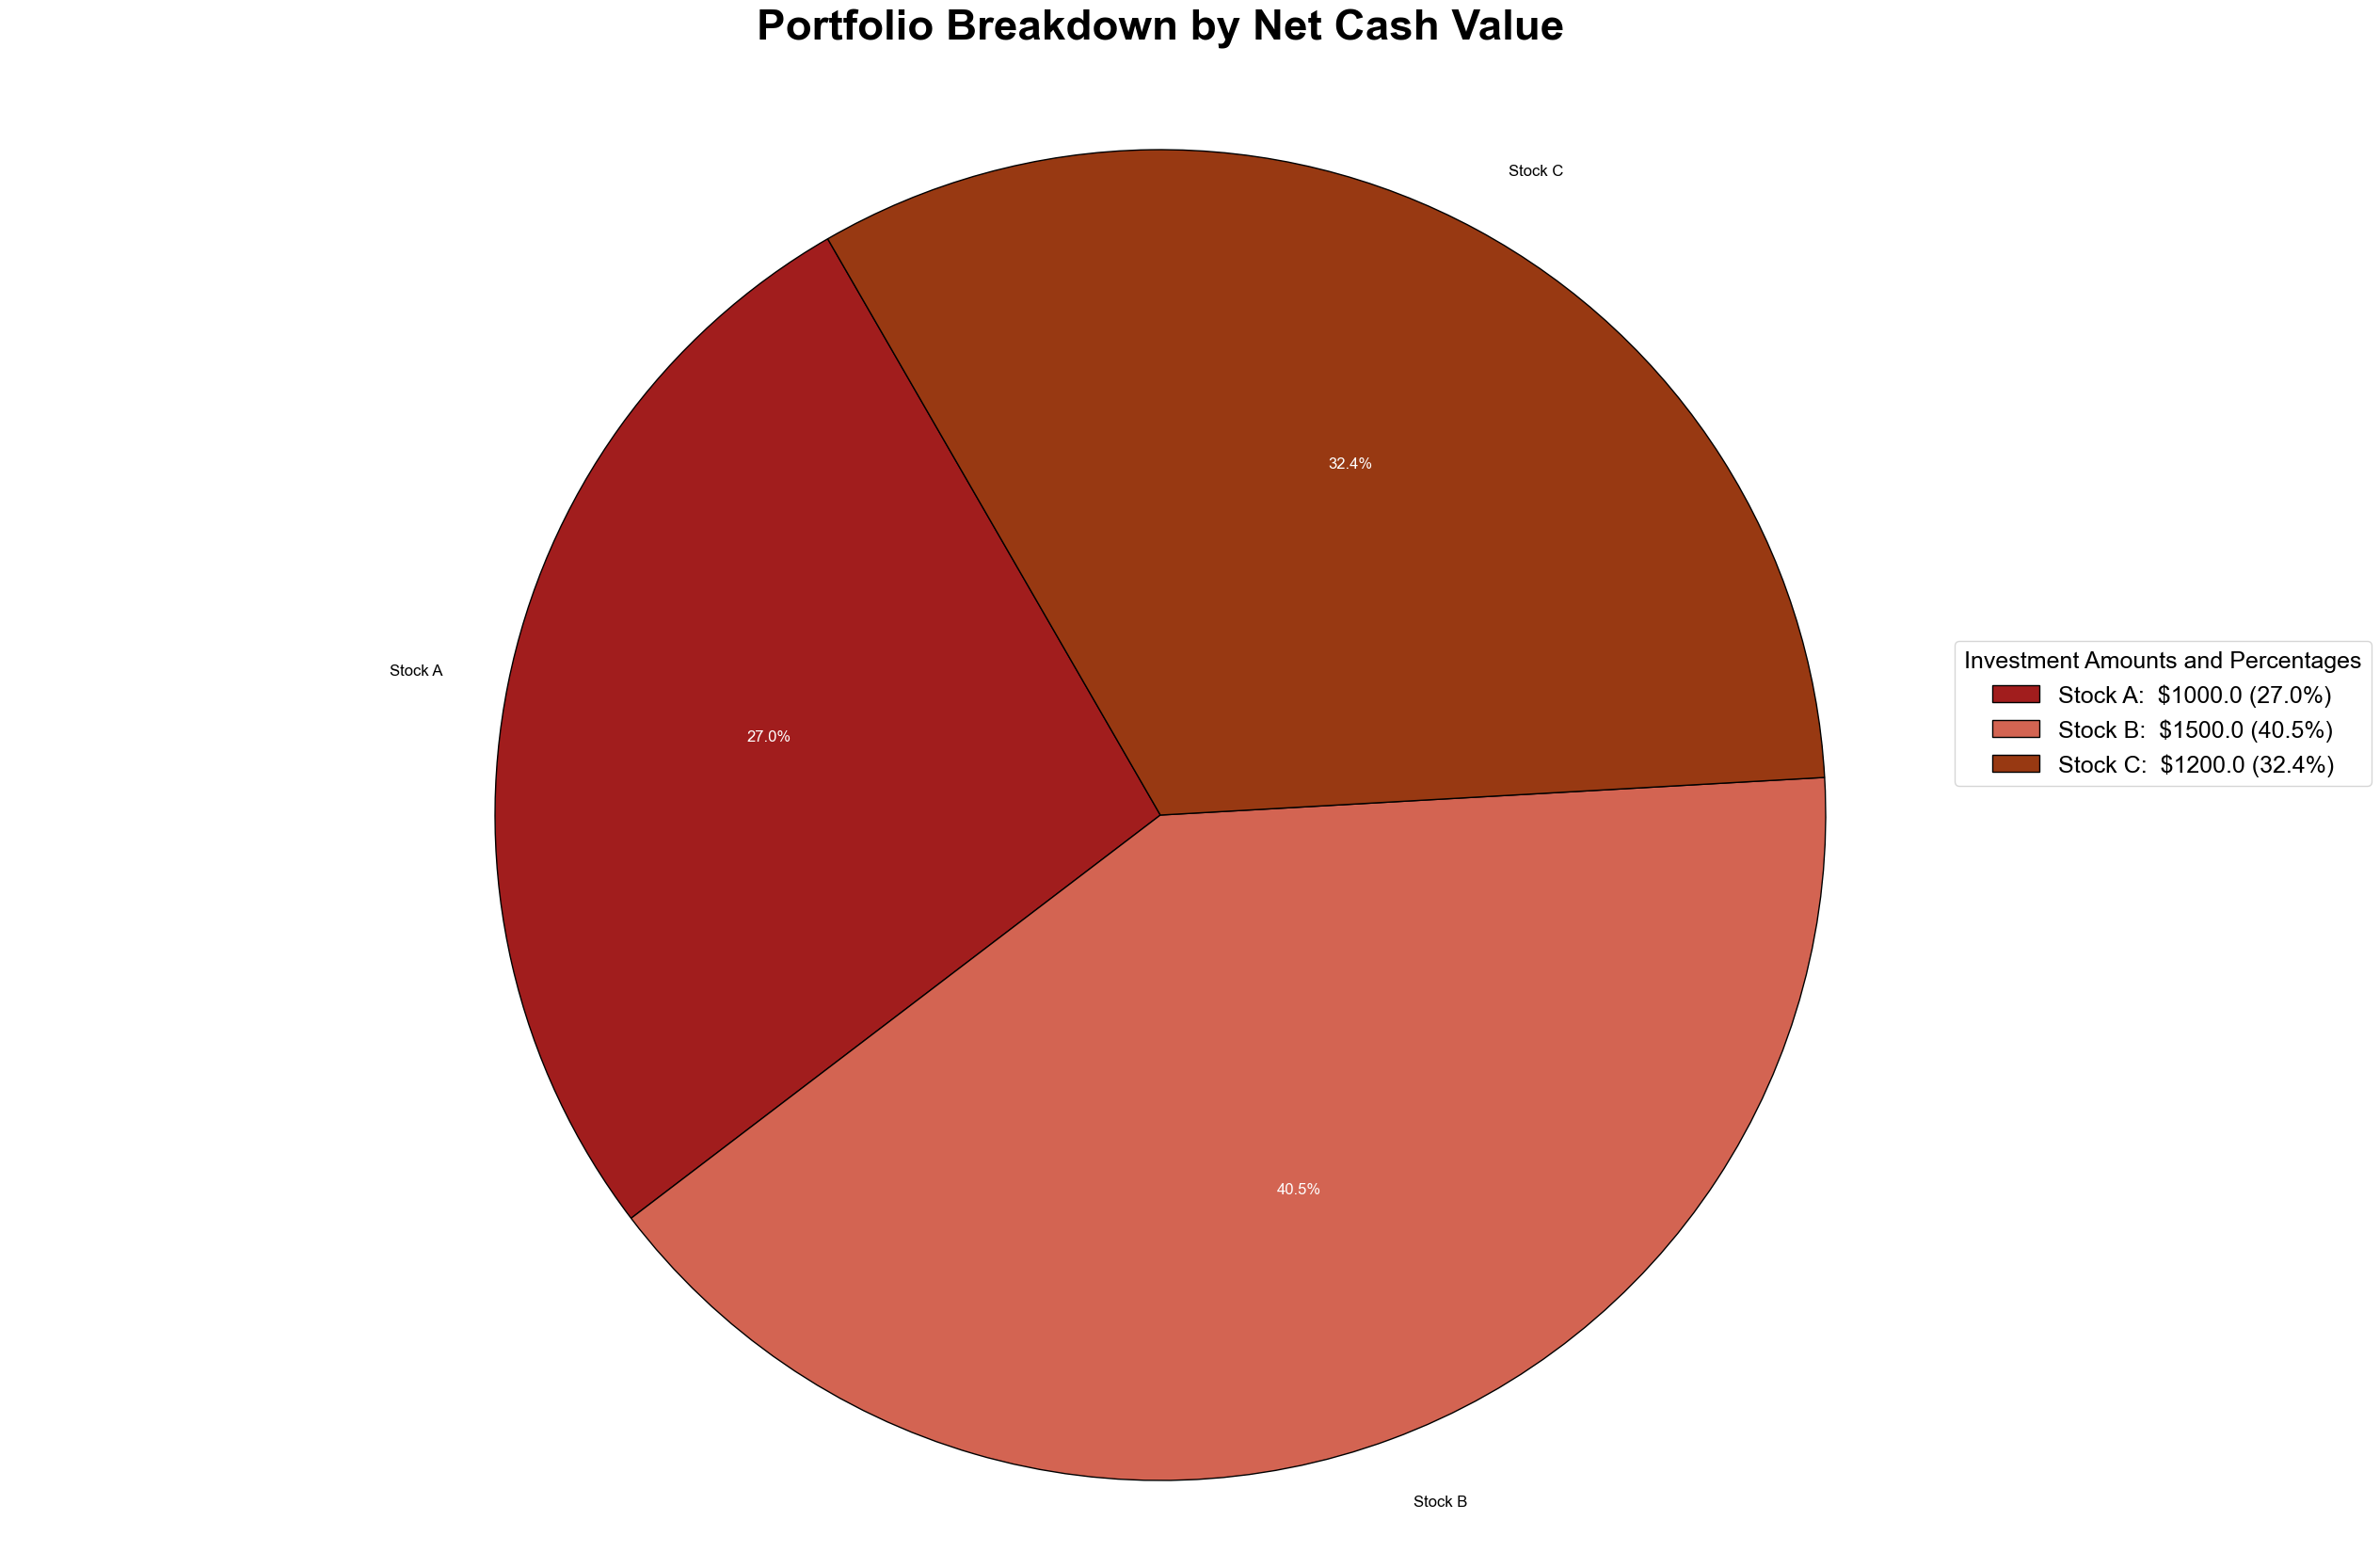

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

#Assuming 'portfolio_df' is your DataFrame and it's already defined
#Example setup for portfolio_df (you should replace this with your actual DataFrame)
portfolio_df = pd.DataFrame({
    'Stock': ['Stock A', 'Stock B', 'Stock C'],
    'Net Cash Value (AUD)': [1000, 1500, 1200]
})

# Calculate the percentages for the legend
portfolio_df['Percentage'] = (portfolio_df['Net Cash Value (AUD)'] / portfolio_df['Net Cash Value (AUD)'].sum()) * 100

# Colors provided by the user with the last two colors changed to green and red
colors =  [
    '#a11d1d', '#d36452', '#983912', '#d8935f', '#e9993e',
    '#cd9a56', '#ecc046', '#83793c', '#9d9d4f', '#84932a',
    '#a0c939', '#a8aaa5', '#5c8f19', '#32d8a9', '#259f8e',
    '#1bd1d1', '#278fa0', '#86cdf2', '#4a9ad6', '#3070b6',
    '#0a2144', '#1f3d88', '#5858d8', '#3f3096', '#5231a5',
    '#571688', '#7d4395', '#a04e94', '#b94d9a', '#b57da1',
    '#c3448c', 'pink', 'red']#, '#829231', '#34a477'


# Set the font to Arial for a more professional look
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18  # Smaller font size for more stocks

# Create a pie chart with the adjusted font and styling, and larger figure size
fig, ax = plt.subplots(figsize=(25, 16))  # Larger figure size for readability
wedges, texts, autotexts = ax.pie(
    portfolio_df['Net Cash Value (AUD)'], labels=portfolio_df['Stock'], autopct='%1.1f%%',
    startangle=120, colors=colors, textprops={'fontsize': 12},  # Smaller font size for the labels
    wedgeprops={"edgecolor": "black", 'linewidth': 1}  # Optional: white line for separation between slices
)

# Improve legibility by setting the percentage color to white
for autotext in autotexts:
    autotext.set_color('white')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Adjust the layout to make room for the legend
plt.tight_layout()

# Update legend labels to include the calculated percentages
legend_labels = [f'{row.Stock}:  ${row["Net Cash Value (AUD)"]:.1f} ({row["Percentage"]:.1f}%)' for index, row in portfolio_df.iterrows()]
ax.legend(legend_labels, title="Investment Amounts and Percentages", loc='center left', bbox_to_anchor=(.84, .57))

# Display the title
plt.title('Portfolio Breakdown by Net Cash Value', fontsize=33, fontweight='bold', pad=37)

# Show the pie chart
plt.show()
